<a href="https://colab.research.google.com/github/Rakshanjain/sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PROJECT ON SENTIMENT ANALYSIS IN REVIEW SYSTEM**
*Importing Modules*

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

*Load the data*

In [13]:
df=pd.read_csv('senti_review_file.csv') # upload the file with same name while executing
df

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
2994,I remember seeing this on TV in the late 70s -...,positive
2995,To experience Head you really need to understa...,positive
2996,"I'm a fan of Judy Garland, Vincente Minnelli, ...",negative
2997,"""Mr. Harvey Lights a Candle"" is anchored by a ...",positive


#Analyse the data (*Visualize the datasets [WordCloud]*)

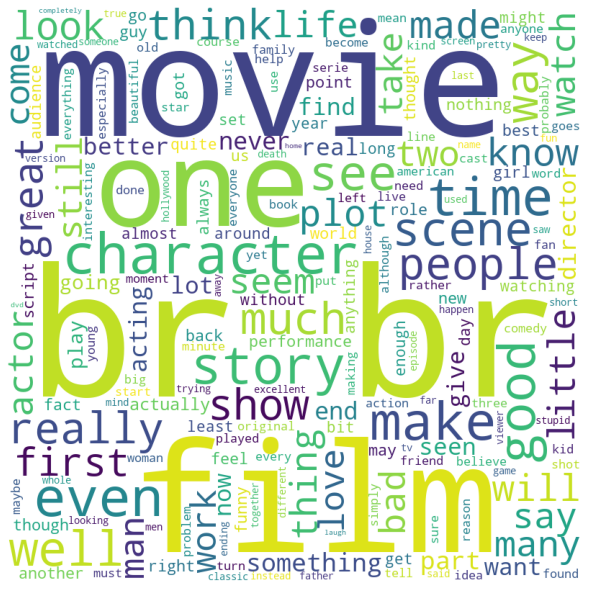

In [14]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.iloc[:,0].values: 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#*Applying TFIDF Vectorizer and Naive Bayes Algorithm*

In [15]:
df['Sentiment'].value_counts()

positive    1508
negative    1491
Name: Sentiment, dtype: int64

In [16]:
x = df.iloc[:,0].values # Review
y = df.iloc[:,1].values # Sentiment

In [17]:
# Splitting the datasets into train and test
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.3,random_state = 0)

In [18]:
x_train.shape

(2099,)

In [19]:
y_train.shape

(2099,)

In [20]:
x_test.shape

(900,)

In [21]:
y_test.shape

(900,)

#*Pipelining*

In [22]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])


Fitting the model

In [23]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Evaluation Model


1.   *Accuracy score*
2.   *Confusion Matrix*
3.   *Classification Report*

In [31]:
y_pred = text_model.predict(x_test)
y_pred[0:30]

array(['positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive'],
      dtype='<U8')

In [32]:
y_test[0:30]

array(['negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'positive'],
      dtype=object)

In [26]:
accuracy_score(y_pred,y_test) 

0.8233333333333334

In [27]:
confusion_matrix(y_pred,y_test) 

array([[375,  79],
       [ 80, 366]])

In [28]:
print("Classification report for - \n{}:\n{}\n".format(text_model,classification_report(y_test, y_pred))) 

Classification report for - 
Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False):
            

# Predict the output using examples

In [29]:
i = 'I’m sorry to hear about your disappointment with us and I would like to personally assist you with making things right'
text_model.predict([i])

array(['negative'], dtype='<U8')

In [30]:
i = 'Thank you so much for your kind words, Jane. We really appreciate you taking the time out to share your experience with us—and we agree, Jordan is truly a gem to have on our team! We count ourselves lucky for customers like you. We look forward to working with you again in the future!'
text_model.predict([i])

array(['positive'], dtype='<U8')